# Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
data_df = pd.read_csv('dataset_exercise_5_clustering_highway_traffic.csv',sep=';')
data_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


In [2]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])
# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)
# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])
# Define the total number of 5-minute intervals in a day
nintvals = 288

In [3]:
# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)
# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])
    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])
        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]
# Print the resulting 'vectorized_day_dataset' and the size of vector
print(vectorized_day_dataset)
print(vectorized_day_dataset.shape)

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]
(365, 288)


In [4]:
# print the number of days with missing value
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value:',np.size(np.where(nans_per_day > 0),1))

number of days with missing value: 28


In [5]:
# Drop the days with missing valus
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
# days_not_nans = days[np.where(nans_per_day == 0)[0]]
print(vectorized_day_dataset_no_nans.shape)

(337, 288)


##### Report your experiments in applying kernel PCA using different kernel functions (e.g., Gaussian, polynomial, etc.) and your assessment of their performance for dimensionality reduction

In [6]:
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt


data = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
data = scaler.fit_transform(data)

    

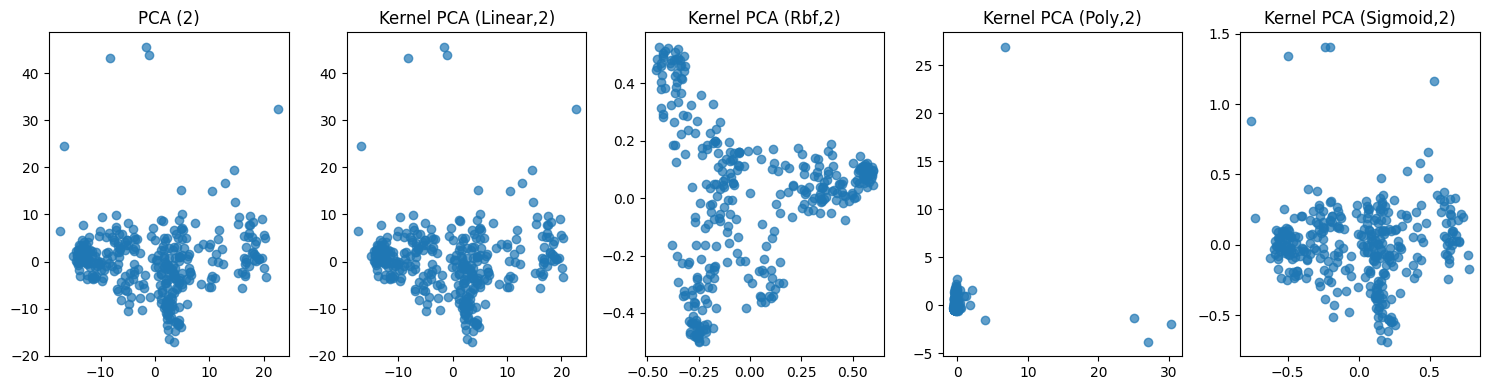

In [7]:
n_comp_numbers = [2]  # [50, 100]
pca_kernel_functions = ['pca', 'linear', 'rbf', 'poly', 'sigmoid']

# Create a single-row grid with 5 columns for plotting
fig, axes = plt.subplots(1, len(pca_kernel_functions), figsize=(15, 4))  # Adjust figsize as needed

for i, kernel in enumerate(pca_kernel_functions):
    ax = axes[i]
    
    if kernel == 'pca':
        # Create PCA model for the current n_components
        pca = PCA(n_components=n_comp_numbers[0])
        pca_result = pca.fit_transform(data)
        ax.scatter(pca_result[:, 0], pca_result[:, 1], marker='o', alpha=0.7)
        ax.set_title(f'PCA ({n_comp_numbers[0]})')
    else:
        # Create Kernel PCA model with the specified kernel and n_components
        kpca = KernelPCA(kernel=kernel, n_components=n_comp_numbers[0])
        kpca_result = kpca.fit_transform(data)
        ax.scatter(kpca_result[:, 0], kpca_result[:, 1], marker='o', alpha=0.7)
        ax.set_title(f'Kernel PCA ({kernel.capitalize()},{n_comp_numbers[0]})')

# Adjust layout
plt.tight_layout()
plt.show()

In [48]:
# import numpy as np
# import pandas as pd
# from sklearn.decomposition import PCA, KernelPCA
# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# data = pd.DataFrame(vectorized_day_dataset_no_nans)
# scaler = StandardScaler()
# data = scaler.fit_transform(data)

# n_comp_numbers = [2]
kernel_functions = ['pca', 'rbf', 'poly', 'sigmoid']

# Create a list to store the stability scores
stability_scores = []

for method in kernel_functions:
    scores = []
    for _ in range(10):  # You can adjust the number of iterations as needed
        if method == 'pca':
            # Create PCA model
            model = PCA(n_components=n_comp_numbers[0])
        else:
            # Create Kernel PCA model with the specified kernel
            model = KernelPCA(kernel=method, n_components=n_comp_numbers[0])
        
        # Fit and transform the data
        result = model.fit_transform(data)
        
        # Apply K-Means clustering to the transformed data
        kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters
        labels = kmeans.fit_predict(result)
        
        # Calculate the within-cluster variance as a stability measure
        cluster_centers = kmeans.cluster_centers_
        distances = np.linalg.norm(result - cluster_centers[labels], axis=1)
        within_cluster_variance = np.mean(distances)
        scores.append(within_cluster_variance)
    
    # Calculate the mean within-cluster variance as a stability measure
    mean_stability_score = np.mean(scores)
    
    # Append the stability score to the list
    stability_scores.append({'Method': method, 'Stability Score': mean_stability_score})

# Create a DataFrame from the list of dictionaries
stability_scores_df = pd.DataFrame(stability_scores)



c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Trisha Chander\AppData\Local\Programs\Python\Pyth

In [50]:
stability_scores_df

,Method,Stability Score
0,pca,4.490958
1,rbf,0.112908
2,poly,0.257443
3,sigmoid,0.177930


In [51]:
# Define the number of iterations for stability analysis
num_iterations = 100

# Define the proportion of data to use in each iteration (e.g., 80%)
prop_data_used = 0.8

# Initialize an array to store the principal component scores
all_pc_scores = []

# Perform PCA on different random subsets of the data
for _ in range(num_iterations):
    # Randomly select a subset of the data
    subset_indices = np.random.choice(data.shape[0], size=int(prop_data_used * data.shape[0]), replace=False)
    subset_data = data[subset_indices]
    
    # Fit PCA on the subset
    pca = PCA(n_components=10)
    pca.fit(subset_data)
    
    # Get the principal component scores for the entire dataset
    pc_scores = pca.transform(data)
    all_pc_scores.append(pc_scores)

# Calculate the stability index
def stability_index(scores, threshold=0.6):
    """
    Calculate the stability index based on the proportion of variance explained.
    
    Args:
        scores (array): Array of principal component scores.
        threshold (float): Threshold for the proportion of variance explained.
        
    Returns:
        stability_index (float): Stability index.
    """
    total_variance = np.var(scores, axis=0).sum()
    explained_variance = np.var(scores, axis=0)
    prop_var_explained = explained_variance / total_variance
    return np.mean(prop_var_explained > threshold)

# Calculate the stability index for principal component scores
stability_idx = stability_index(np.array(all_pc_scores))

print(f"Stability Index: {stability_idx}")

Stability Index: 0.0


In [52]:
pc_scores

array([[ 2.37309647e+01,  3.19712587e+01, -1.09043258e+01, ...,
         1.24720059e+01,  1.01481716e+01,  2.47943415e+00],
       [ 1.70311631e+01,  5.38712832e+00,  3.75153860e+00, ...,
        -1.75584093e+00, -2.48149254e+00, -1.68006403e+00],
       [ 1.79963517e+01,  7.66035684e+00,  8.49065082e-01, ...,
        -3.06302286e-01, -1.29210989e+00, -7.80883681e-02],
       ...,
       [ 2.96068190e+00, -2.70988640e+00,  1.25902369e+00, ...,
         1.21752835e+00, -1.80580211e+00, -9.28110798e-03],
       [ 4.00658977e+00, -7.74100526e-02, -4.70325652e-01, ...,
         8.73965707e-01, -1.11653564e+00,  9.77454130e-01],
       [ 1.28725566e+01,  1.60118464e+01,  7.06694597e+00, ...,
        -4.54610757e+00,  4.72853272e-01, -1.15106661e+00]])

In [53]:
all_pc_scores

[array([[21.96458151, 30.56776935, -8.90295867, ...,  3.02019344,
          1.41580365, 17.79375083],
        [18.01120493,  6.06436511,  2.22642239, ...,  0.58879299,
          0.43747112, -3.04405691],
        [18.67156445,  8.28027563, -0.15561155, ...,  0.76687764,
         -0.49529854, -0.44654226],
        ...,
        [ 3.96392911, -2.45808529,  0.05835784, ...,  2.07915741,
         -0.50217898, -1.01715745],
        [ 4.78630325,  0.09497317, -1.50986754, ...,  0.99006664,
         -1.03875774, -0.52360092],
        [13.59311022, 16.62728153,  4.4626122 , ..., -2.48338684,
          1.34312112, -1.68464183]]),
 array([[ 2.36469222e+01,  3.19867848e+01, -1.05537268e+01, ...,
          1.36203512e+01,  1.10958414e+01,  2.82253436e+00],
        [ 1.74243134e+01,  5.44016727e+00,  3.12711733e+00, ...,
         -2.03261346e+00, -3.16941727e+00, -2.73116783e-02],
        [ 1.83382293e+01,  7.79704571e+00,  3.74820602e-01, ...,
         -2.08270031e-01, -1.42361942e+00, -7.82982659e-

In [71]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the data
data = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Define the number of iterations for stability analysis
num_iterations = 100

# Define the proportion of data to use in each iteration (e.g., 80%)
prop_data_used = 0.8

# Define the number of top principal components to select
k_components = 2

# Define the list of kernel functions
kernel_functions = ['linear', 'rbf', 'poly', 'sigmoid']

# Initialize an array to store the top k principal components
all_top_components = []

# Iterate through kernel functions
for kernel in kernel_functions:
    # Initialize arrays to store the top k principal components
    all_top_components_kernel = []

    # Perform PCA on different random subsets of the data
    for _ in range(num_iterations):
        # Randomly select a subset of the data
        subset_indices = np.random.choice(data.shape[0], size=int(prop_data_used * data.shape[0]), replace=False)
        subset_data = data[subset_indices]

        if kernel == 'pca':
            # Fit PCA on the subset
            pca = PCA(n_components=k_components)
            pca.fit(subset_data)

            # Get the top k principal components and store them
            top_components = pca.components_
            all_top_components_kernel.append(top_components)
        else:
            # Fit Kernel PCA with the specified kernel on the subset
            kpca = KernelPCA(kernel=kernel, n_components=k_components)
            kpca.fit(subset_data)

            # Get the top k principal components and store them
            top_components_kernel = kpca.transform(subset_data)
            all_top_components_kernel.append(top_components_kernel)

    # Calculate the L2 distance (Euclidean distance) between top k components of different iterations
    def l2_distance(components1, components2):
        return np.linalg.norm(components1 - components2)

    # Calculate the stability index based on L2 distance
    def stability_index(components_list):
        num_iterations = len(components_list)
        distances = np.zeros((num_iterations, num_iterations))

        for i in range(num_iterations):
            for j in range(num_iterations):
                if i != j:
                    distance = l2_distance(components_list[i], components_list[j])
                    distances[i, j] = distance

        similarity = 1 / (1 + distances)  # Invert and scale the distances to the range [0, 1]
        similarity = np.mean(similarity)
        return similarity

    # Calculate the similarity index for top k principal components with the current kernel
    stability_idx_kernel = stability_index(all_top_components_kernel)
    print(f"Stability Index (L2 Distance) for Kernel {kernel}: {stability_idx_kernel}")


Stability Index (L2 Distance) for Kernel linear: 0.013490952278927918
Stability Index (L2 Distance) for Kernel rbf: 0.10328911965205373
Stability Index (L2 Distance) for Kernel poly: 0.02340447590150489
Stability Index (L2 Distance) for Kernel sigmoid: 0.0947837275116525


In [17]:
from sklearn.metrics import silhouette_score
pca_kernel_functions = ['pca', 'rbf', 'poly','sigmoid']
# Create a list to store the evaluation scores
evaluation_scores = []

for method in pca_kernel_functions:
    silhouette_scores = []
    # davies_bouldin_scores = []
    # calinski_harabasz_scores = []
    
    # Initialize the scores outside the loop
    for _ in range(10):  # You can adjust the number of iterations as needed
        if method == 'pca':
            # Create PCA model
            model = PCA(n_components=n_comp_numbers[0])
        else:
            # Create Kernel PCA model with the specified kernel
            model = KernelPCA(kernel=method, n_components=n_comp_numbers[0])
        
        # Fit and transform the data
        result = model.fit_transform(data)
        
        # Apply K-Means clustering to the transformed data
        num_clusters = 5  # You can adjust the number of clusters
        try:
            kmeans = KMeans(n_clusters=num_clusters)
            labels = kmeans.fit_predict(result)
            
            # Ensure that more than one cluster is formed
            if len(set(labels)) < 2:
                continue  # Skip this iteration
                
            # Calculate silhouette score
            silhouette = silhouette_score(result, labels)
            silhouette_scores.append(silhouette)
            
            # Calculate Davies-Bouldin score
            # davies_bouldin = davies_bouldin_score(result, labels)
            # davies_bouldin_scores.append(davies_bouldin)
            
            # Calculate Calinski-Harabasz score
            # calinski_harabasz = calinski_harabasz_score(result, labels)
            # calinski_harabasz_scores.append(calinski_harabasz)
        except:
            continue
    
    # Calculate the mean scores
    mean_silhouette_score = np.mean(silhouette_scores)
    # mean_davies_bouldin_score = np.mean(davies_bouldin_scores)
    # mean_calinski_harabasz_score = np.mean(calinski_harabasz_scores)

    # Normalize the Calinski-Harabasz score by dividing by its maximum value
    # max_calinski_harabasz = np.max(calinski_harabasz_scores)
    # normalized_calinski_harabasz = mean_calinski_harabasz_score / max_calinski_harabasz
    
    
    
    
    # Append the scores to the list
    evaluation_scores.append({
        'Method': method,
        'Silhouette Score': mean_silhouette_score
        # 'Davies-Bouldin Score': mean_davies_bouldin_score,
        # 'Calinski-Harabasz Score': mean_calinski_harabasz_score,
        # 'Evaluation Metric': evaluation_metric
    })

# Create a DataFrame from the list of dictionaries
evaluation_scores_df = pd.DataFrame(evaluation_scores)



c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Trisha Chander\AppData\Local\Programs\Python\Pyth

In [21]:
evaluation_scores_df

,Method,Silhouette Score
0,pca,0.485491
1,rbf,0.517152
2,poly,0.479314
3,sigmoid,NaN


##### Compare the performance of kernel PCA with PCA (baseline from practice task 1 in practice session) for dimensionality reduction in dataset 1 and propose a suitable method (PCA or kernel PCA with a specific kernel function) to perform dimensionality reduction in dataset 1.

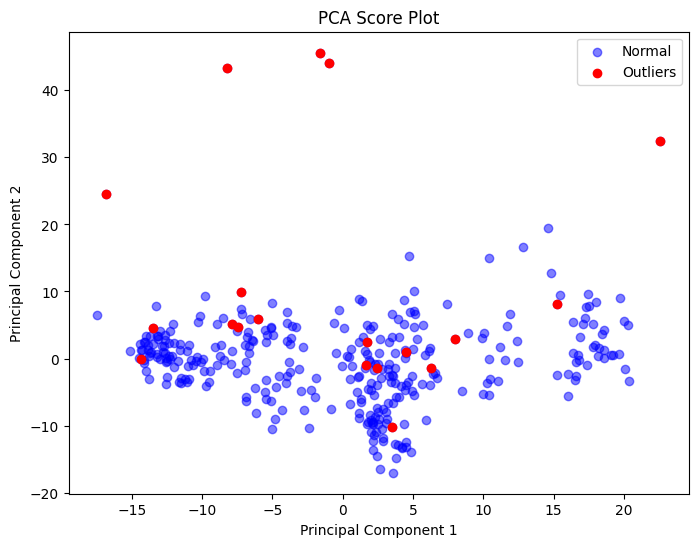

Number of detected outliers: 19
Detected outliers: [  0  40 113 175 176 202 213 218 230 231 248 253 258 279 280 288 299 315
 329]


In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

# Apply PCA for reconstruction
pca = PCA(n_components=2)
X_reconstructed = pca.inverse_transform(pca.fit_transform(X_normalized))

# Calculate reconstruction errors
reconstruction_error = np.mean(np.square(X_normalized - X_reconstructed), axis=1)

# Set a threshold for the reconstruction error
threshold = 1  # Adjust as needed

# Identify outliers
outliers = np.where(reconstruction_error > threshold)[0]

# Visual Inspection of PCA Score Plots
pca_scores = pca.fit_transform(X_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c='b', alpha=0.5, label='Normal')
plt.scatter(pca_scores[outliers, 0], pca_scores[outliers, 1], c='r', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Score Plot')
plt.show()

# Print the indices of detected outliers
print(f'Number of detected outliers: {outliers.shape[0]}')
print(f'Detected outliers: {outliers}')


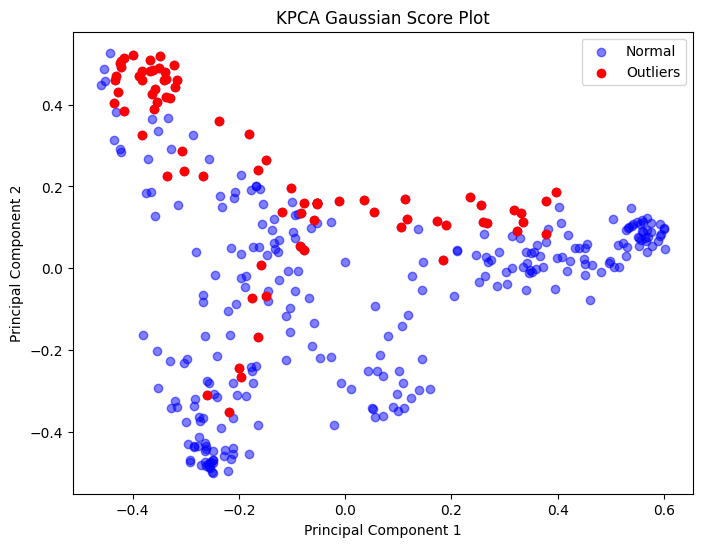

Number of detected outliers: 78
Detected outliers: [  0   1   2   5   8   9  15  16  23  26  29  35  36  40  43  48  49  54
  55  60  61  62  68  69  76  82  83  84  86  87  88  93  94  98 101 107
 108 111 112 113 114 125 130 134 143 150 156 166 167 172 175 176 202 213
 218 230 231 237 248 249 253 255 258 266 269 273 279 280 283 284 288 290
 299 304 315 329 330 336]


In [15]:
from sklearn.decomposition import KernelPCA

# Load and preprocess the data
data = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

# Step 1: Visual Inspection of Kernel PCA Score Plots
# Perform Kernel PCA
# Kernel functions : 'linear', 'rbf', 'poly', 'sigmoid'.
kpca = KernelPCA(kernel='rbf', n_components=2, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_normalized)


# Step 2: Detecting Outliers through Computing Reconstruction Errors
# Reconstruct the data from the reduced kernel PCA space
X_reconstructed = kpca.inverse_transform(X_kpca)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(X_normalized - X_reconstructed), axis=1)

# Define a threshold for outliers
threshold = 1  # Adjust as needed
kpca_scores = kpca.fit_transform(X_normalized)
# Identify outliers
outliers = np.where(reconstruction_error > threshold)[0]

plt.figure(figsize=(8, 6))
plt.scatter(kpca_scores[:, 0], kpca_scores[:, 1], c='b', alpha=0.5, label='Normal')
plt.scatter(kpca_scores[outliers, 0], kpca_scores[outliers, 1], c='r', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('KPCA Gaussian Score Plot')
plt.show()
# Print the number of detected outliers
print(f'Number of detected outliers: {outliers.shape[0]}')
print(f'Detected outliers: {outliers}')

